In [1]:
# -*- coding : utf-8 -*-

from sklearn.datasets import fetch_olivetti_faces
from keras.utils.np_utils import to_categorical
from keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

ImportError: cannot import name 'fetch_olivetti_faces'

In [ ]:
class olivetti_DNN(models.Sequential):
    
    def __init__(self, Nh, Pd, No = 40, Ni = None):
        
        super().__init__()
        self.add(layers.Dense(Nh[0], input_shape = (Ni,), activation= 'relu'))
        self.add(layers.Dropout(Pd[0]))
        for rep in range(1, len(Nh)):
            Nh_rep, Pd_rep = Nh[rep], Pd[rep]
            self.add(layers.Dense(Nh_rep, activation='relu'))
            self.add(layers.Dropout(Pd_rep))
        self.add(layers.Dense(No, activation='softmax'))
        self.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

        


In [90]:
class plot_al:
    def __init__(self, histo):
        self.histo = histo
        
    def plot_acc(self):
        plt.plot(self.histo.history['acc'])
        plt.plot(self.histo.history['val_acc'])
        plt.title('Model Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend(['Train', 'Test'], loc = 0)
        
    def plot_loss(self):
        plt.plot(self.histo.history['loss'])
        plt.plot(self.histo.history['val_loss'])
        plt.title('Model Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend(['Train', 'Test'], loc = 0)

In [68]:
faces = fetch_olivetti_faces()
faces.keys()

In [103]:
def load_data():
    
    faces = fetch_olivetti_faces()
    img, _, lab, _ = faces.data, faces.images, faces.target, faces.DESCR
    
    lab= to_categorical(lab)
    L, S = img.shape
    img = img.reshape(-1, S)
    
    img_train = img[:300]
    img_test = img[300:]
        
    lab_train = lab[:300]
    lab_test = lab[300:]  
    return (img_train, lab_train), (img_test, lab_test)


In [104]:
def main(Nh, Pd, epochs = 20):
    (img_train, lab_train), (img_test, lab_test) = load_data()
    model = olivetti_DNN(Ni = img_train.shape[1], Nh = Nh, Pd = Pd)
    histo = model.fit(img_train, lab_train, batch_size = 100, 
                      epochs = epochs, validation_split= 0.2)
    perform_test = model.evaluate(img_test, lab_test, batch_size = 100)
    print('Test Accuracy and Loss : ', perform_test)
    
    plot = plot_al(histo)
    plt.subplot(1,2,1)
    plot.plot_acc()
    
    plt.subplot(1,2,2)
    plot.plot_loss()
    plt.show()
    


In [105]:
(img_train, lab_train), (img_test, lab_test) = load_data()
print(img_train.shape)
print(img_test.shape)

print(lab_train.shape)
print(lab_test.shape)


(300, 4096)
(100, 4096)
(300, 40)
(100, 40)


Train on 240 samples, validate on 60 samples
Epoch 1/150


100/240 [===========>..................] - ETA: 1s - loss: 3.7297 - acc: 0.0100

240/240 [==============================] - 1s 4ms/step - loss: 3.6724 - acc: 0.0250 - val_loss: 4.2865 - val_acc: 0.0000e+00


Epoch 2/150
100/240 [===========>..................] - ETA: 0s - loss: 3.4633 - acc: 0.0200

240/240 [==============================] - 0s 416us/step - loss: 3.4082 - acc: 0.0250 - val_loss: 5.0540 - val_acc: 0.0000e+00


Epoch 3/150
100/240 [===========>..................] - ETA: 0s - loss: 3.3345 - acc: 0.0400

240/240 [==============================] - 0s 420us/step - loss: 3.3903 - acc: 0.0375 - val_loss: 4.9911 - val_acc: 0.0000e+00


Epoch 4/150
100/240 [===========>..................] - ETA: 0s - loss: 3.3368 - acc: 0.0200

240/240 [==============================] - 0s 403us/step - loss: 3.3857 - acc: 0.0167 - val_loss: 4.5366 - val_acc: 0.0000e+00


Epoch 5/150
100/240 [===========>..................] - ETA: 0s - loss: 3.3255 - acc: 0.0400



240/240 [==============================] - 0s 399us/step - loss: 3.3031 - acc: 0.0542 - val_loss: 4.8617 - val_acc: 0.0000e+00


Epoch 6/150
100/240 [===========>..................] - ETA: 0s - loss: 3.2372 - acc: 0.0300

240/240 [==============================] - 0s 436us/step - loss: 3.2904 - acc: 0.0250 - val_loss: 5.7571 - val_acc: 0.0000e+00


Epoch 7/150
100/240 [===========>..................] - ETA: 0s - loss: 3.2716 - acc: 0.0200

240/240 [==============================] - 0s 432us/step - loss: 3.2523 - acc: 0.0333 - val_loss: 5.8499 - val_acc: 0.0000e+00


Epoch 8/150
100/240 [===========>..................] - ETA: 0s - loss: 3.2158 - acc: 0.0500

240/240 [==============================] - 0s 424us/step - loss: 3.2627 - acc: 0.0333 - val_loss: 5.5893 - val_acc: 0.0000e+00


Epoch 9/150
100/240 [===========>..................] - ETA: 0s - loss: 3.1989 - acc: 0.0200

240/240 [==============================] - 0s 436us/step - loss: 3.2294 - acc: 0.0375 - val_loss: 5.2954 - val_acc: 0.0000e+00


Epoch 10/150
100/240 [===========>..................] - ETA: 0s - loss: 3.1604 - acc: 0.0800

240/240 [==============================] - 0s 403us/step - loss: 3.2047 - acc: 0.0708 - val_loss: 5.6685 - val_acc: 0.0000e+00


Epoch 11/150
100/240 [===========>..................] - ETA: 0s - loss: 3.2239 - acc: 0.0600



240/240 [==============================] - 0s 420us/step - loss: 3.2116 - acc: 0.0583 - val_loss: 6.1800 - val_acc: 0.0000e+00


Epoch 12/150
100/240 [===========>..................] - ETA: 0s - loss: 3.2306 - acc: 0.0800

240/240 [==============================] - 0s 486us/step - loss: 3.2319 - acc: 0.0750 - val_loss: 6.0545 - val_acc: 0.0000e+00


Epoch 13/150
100/240 [===========>..................] - ETA: 0s - loss: 3.2428 - acc: 0.0200

240/240 [==============================] - 0s 424us/step - loss: 3.2277 - acc: 0.0292 - val_loss: 5.6430 - val_acc: 0.0000e+00


Epoch 14/150
100/240 [===========>..................] - ETA: 0s - loss: 3.2083 - acc: 0.0500

240/240 [==============================] - 0s 432us/step - loss: 3.2040 - acc: 0.0500 - val_loss: 5.9704 - val_acc: 0.0000e+00


Epoch 15/150
100/240 [===========>..................] - ETA: 0s - loss: 3.2125 - acc: 0.0500

240/240 [==============================] - 0s 416us/step - loss: 3.1956 - acc: 0.0667 - val_loss: 6.5190 - val_acc: 0.0000e+00


Epoch 16/150
100/240 [===========>..................] - ETA: 0s - loss: 3.2296 - acc: 0.0600

240/240 [==============================] - 0s 411us/step - loss: 3.2192 - acc: 0.0500 - val_loss: 5.8985 - val_acc: 0.0000e+00


Epoch 17/150
100/240 [===========>..................] - ETA: 0s - loss: 3.2247 - acc: 0.0400



240/240 [==============================] - 0s 399us/step - loss: 3.2178 - acc: 0.0333 - val_loss: 5.5849 - val_acc: 0.0000e+00


Epoch 18/150
100/240 [===========>..................] - ETA: 0s - loss: 3.1948 - acc: 0.0700



240/240 [==============================] - 0s 449us/step - loss: 3.2016 - acc: 0.0500 - val_loss: 6.6147 - val_acc: 0.0000e+00


Epoch 19/150
100/240 [===========>..................] - ETA: 0s - loss: 3.2003 - acc: 0.0400

240/240 [==============================] - 0s 445us/step - loss: 3.1840 - acc: 0.0458 - val_loss: 6.6199 - val_acc: 0.0000e+00


Epoch 20/150
100/240 [===========>..................] - ETA: 0s - loss: 3.1738 - acc: 0.0900

240/240 [==============================] - 0s 482us/step - loss: 3.1709 - acc: 0.0917 - val_loss: 6.5675 - val_acc: 0.0000e+00


Epoch 21/150
100/240 [===========>..................] - ETA: 0s - loss: 3.1140 - acc: 0.0900

240/240 [==============================] - 0s 440us/step - loss: 3.1141 - acc: 0.0833 - val_loss: 7.3946 - val_acc: 0.0000e+00


Epoch 22/150
100/240 [===========>..................] - ETA: 0s - loss: 3.1090 - acc: 0.0900

240/240 [==============================] - 0s 420us/step - loss: 3.0942 - acc: 0.0958 - val_loss: 7.6539 - val_acc: 0.0000e+00


Epoch 23/150
100/240 [===========>..................] - ETA: 0s - loss: 3.0779 - acc: 0.0900

240/240 [==============================] - 0s 407us/step - loss: 3.0404 - acc: 0.0875 - val_loss: 7.9312 - val_acc: 0.0000e+00


Epoch 24/150
100/240 [===========>..................] - ETA: 0s - loss: 3.0506 - acc: 0.0700

240/240 [==============================] - 0s 449us/step - loss: 3.0164 - acc: 0.0708 - val_loss: 7.2748 - val_acc: 0.0000e+00


Epoch 25/150
100/240 [===========>..................] - ETA: 0s - loss: 2.9260 - acc: 0.0900

240/240 [==============================] - 0s 432us/step - loss: 2.9592 - acc: 0.0792 - val_loss: 7.9794 - val_acc: 0.0000e+00


Epoch 26/150
100/240 [===========>..................] - ETA: 0s - loss: 2.8441 - acc: 0.0600

240/240 [==============================] - 0s 403us/step - loss: 2.8810 - acc: 0.0750 - val_loss: 8.0062 - val_acc: 0.0000e+00


Epoch 27/150
100/240 [===========>..................] - ETA: 0s - loss: 2.8486 - acc: 0.1000

240/240 [==============================] - 0s 407us/step - loss: 2.8896 - acc: 0.0750 - val_loss: 8.1420 - val_acc: 0.0000e+00


Epoch 28/150
100/240 [===========>..................] - ETA: 0s - loss: 2.6886 - acc: 0.1200



240/240 [==============================] - 0s 403us/step - loss: 2.8433 - acc: 0.1167 - val_loss: 8.2962 - val_acc: 0.0000e+00


Epoch 29/150
100/240 [===========>..................] - ETA: 0s - loss: 2.8860 - acc: 0.1400

240/240 [==============================] - 0s 445us/step - loss: 2.8599 - acc: 0.1042 - val_loss: 8.9287 - val_acc: 0.0000e+00


Epoch 30/150
100/240 [===========>..................] - ETA: 0s - loss: 2.7868 - acc: 0.1600

240/240 [==============================] - 0s 449us/step - loss: 2.7685 - acc: 0.1292 - val_loss: 10.7724 - val_acc: 0.0000e+00


Epoch 31/150
100/240 [===========>..................] - ETA: 0s - loss: 2.7135 - acc: 0.1300

240/240 [==============================] - 0s 420us/step - loss: 2.7257 - acc: 0.1292 - val_loss: 8.8695 - val_acc: 0.0000e+00


Epoch 32/150
100/240 [===========>..................] - ETA: 0s - loss: 2.7702 - acc: 0.0900

240/240 [==============================] - 0s 436us/step - loss: 2.7486 - acc: 0.0875 - val_loss: 9.5477 - val_acc: 0.0000e+00


Epoch 33/150
100/240 [===========>..................] - ETA: 0s - loss: 2.8488 - acc: 0.1200

240/240 [==============================] - 0s 436us/step - loss: 2.7774 - acc: 0.1000 - val_loss: 9.7416 - val_acc: 0.0000e+00


Epoch 34/150
100/240 [===========>..................] - ETA: 0s - loss: 2.6915 - acc: 0.0800

240/240 [==============================] - 0s 416us/step - loss: 2.6127 - acc: 0.1167 - val_loss: 10.5119 - val_acc: 0.0000e+00


Epoch 35/150
100/240 [===========>..................] - ETA: 0s - loss: 2.5877 - acc: 0.1800

240/240 [==============================] - 0s 428us/step - loss: 2.5105 - acc: 0.1833 - val_loss: 10.0413 - val_acc: 0.0000e+00


Epoch 36/150
100/240 [===========>..................] - ETA: 0s - loss: 2.3926 - acc: 0.2400

240/240 [==============================] - 0s 403us/step - loss: 2.4784 - acc: 0.1792 - val_loss: 11.3560 - val_acc: 0.0000e+00


Epoch 37/150
100/240 [===========>..................] - ETA: 0s - loss: 2.3805 - acc: 0.1700

240/240 [==============================] - 0s 436us/step - loss: 2.3768 - acc: 0.1750 - val_loss: 12.1471 - val_acc: 0.0000e+00


Epoch 38/150
100/240 [===========>..................] - ETA: 0s - loss: 2.5221 - acc: 0.2000

240/240 [==============================] - 0s 415us/step - loss: 2.3984 - acc: 0.2292 - val_loss: 10.4526 - val_acc: 0.0000e+00


Epoch 39/150
100/240 [===========>..................] - ETA: 0s - loss: 2.5733 - acc: 0.1200

240/240 [==============================] - 0s 411us/step - loss: 2.4723 - acc: 0.1875 - val_loss: 10.8061 - val_acc: 0.0000e+00


Epoch 40/150
100/240 [===========>..................] - ETA: 0s - loss: 2.3814 - acc: 0.1500

240/240 [==============================] - 0s 436us/step - loss: 2.3447 - acc: 0.1875 - val_loss: 11.6151 - val_acc: 0.0000e+00


Epoch 41/150
100/240 [===========>..................] - ETA: 0s - loss: 2.2544 - acc: 0.2800

240/240 [==============================] - 0s 420us/step - loss: 2.3196 - acc: 0.2583 - val_loss: 12.2926 - val_acc: 0.0000e+00


Epoch 42/150
100/240 [===========>..................] - ETA: 0s - loss: 2.3039 - acc: 0.2000

240/240 [==============================] - 0s 432us/step - loss: 2.2554 - acc: 0.2292 - val_loss: 11.3074 - val_acc: 0.0000e+00


Epoch 43/150
100/240 [===========>..................] - ETA: 0s - loss: 2.3194 - acc: 0.2000

240/240 [==============================] - 0s 411us/step - loss: 2.1508 - acc: 0.2417 - val_loss: 12.6722 - val_acc: 0.0000e+00


Epoch 44/150
100/240 [===========>..................] - ETA: 0s - loss: 2.1371 - acc: 0.2500

240/240 [==============================] - 0s 445us/step - loss: 2.1442 - acc: 0.2542 - val_loss: 12.8946 - val_acc: 0.0000e+00


Epoch 45/150
100/240 [===========>..................] - ETA: 0s - loss: 2.0929 - acc: 0.2300

240/240 [==============================] - 0s 432us/step - loss: 2.2696 - acc: 0.2000 - val_loss: 11.6222 - val_acc: 0.0000e+00


Epoch 46/150
100/240 [===========>..................] - ETA: 0s - loss: 2.0755 - acc: 0.2500

240/240 [==============================] - 0s 420us/step - loss: 2.1634 - acc: 0.2333 - val_loss: 12.3087 - val_acc: 0.0000e+00


Epoch 47/150
100/240 [===========>..................] - ETA: 0s - loss: 1.9389 - acc: 0.2800

240/240 [==============================] - 0s 428us/step - loss: 2.1565 - acc: 0.2375 - val_loss: 13.4638 - val_acc: 0.0000e+00


Epoch 48/150
100/240 [===========>..................] - ETA: 0s - loss: 2.4669 - acc: 0.1900

240/240 [==============================] - 0s 424us/step - loss: 2.2738 - acc: 0.2250 - val_loss: 10.3737 - val_acc: 0.0000e+00


Epoch 49/150
100/240 [===========>..................] - ETA: 0s - loss: 2.2879 - acc: 0.2200

240/240 [==============================] - 0s 424us/step - loss: 2.2389 - acc: 0.2375 - val_loss: 12.3867 - val_acc: 0.0000e+00


Epoch 50/150
100/240 [===========>..................] - ETA: 0s - loss: 2.0416 - acc: 0.2700

240/240 [==============================] - 0s 461us/step - loss: 2.1587 - acc: 0.2292 - val_loss: 11.8454 - val_acc: 0.0000e+00


Epoch 51/150
100/240 [===========>..................] - ETA: 0s - loss: 2.0742 - acc: 0.2700

240/240 [==============================] - 0s 461us/step - loss: 2.1334 - acc: 0.2542 - val_loss: 12.0604 - val_acc: 0.0000e+00


Epoch 52/150
100/240 [===========>..................] - ETA: 0s - loss: 2.1088 - acc: 0.1900

240/240 [==============================] - 0s 440us/step - loss: 2.0862 - acc: 0.2542 - val_loss: 11.1082 - val_acc: 0.0000e+00


Epoch 53/150
100/240 [===========>..................] - ETA: 0s - loss: 2.3609 - acc: 0.2400

240/240 [==============================] - 0s 424us/step - loss: 2.1997 - acc: 0.2583 - val_loss: 11.7537 - val_acc: 0.0000e+00


Epoch 54/150
100/240 [===========>..................] - ETA: 0s - loss: 2.0666 - acc: 0.3000

240/240 [==============================] - 0s 432us/step - loss: 2.1189 - acc: 0.2750 - val_loss: 12.0099 - val_acc: 0.0000e+00


Epoch 55/150
100/240 [===========>..................] - ETA: 0s - loss: 1.9987 - acc: 0.3100

240/240 [==============================] - 0s 411us/step - loss: 1.9788 - acc: 0.3042 - val_loss: 12.4517 - val_acc: 0.0000e+00


Epoch 56/150
100/240 [===========>..................] - ETA: 0s - loss: 2.0592 - acc: 0.3400

240/240 [==============================] - 0s 440us/step - loss: 2.0220 - acc: 0.3083 - val_loss: 11.6764 - val_acc: 0.0000e+00


Epoch 57/150
100/240 [===========>..................] - ETA: 0s - loss: 1.9435 - acc: 0.3000

240/240 [==============================] - 0s 428us/step - loss: 1.9777 - acc: 0.3000 - val_loss: 10.6065 - val_acc: 0.0000e+00


Epoch 58/150
100/240 [===========>..................] - ETA: 0s - loss: 1.9461 - acc: 0.3200

240/240 [==============================] - 0s 420us/step - loss: 1.9166 - acc: 0.3542 - val_loss: 12.7885 - val_acc: 0.0000e+00


Epoch 59/150
100/240 [===========>..................] - ETA: 0s - loss: 1.9113 - acc: 0.3500

240/240 [==============================] - 0s 399us/step - loss: 1.9077 - acc: 0.3625 - val_loss: 11.4747 - val_acc: 0.0000e+00


Epoch 60/150
100/240 [===========>..................] - ETA: 0s - loss: 2.0269 - acc: 0.3100

240/240 [==============================] - 0s 428us/step - loss: 1.9998 - acc: 0.3125 - val_loss: 11.7307 - val_acc: 0.0000e+00


Epoch 61/150
100/240 [===========>..................] - ETA: 0s - loss: 2.0488 - acc: 0.3200

240/240 [==============================] - 0s 436us/step - loss: 1.9649 - acc: 0.3333 - val_loss: 12.2913 - val_acc: 0.0000e+00


Epoch 62/150
100/240 [===========>..................] - ETA: 0s - loss: 2.0351 - acc: 0.2600

240/240 [==============================] - 0s 432us/step - loss: 2.0460 - acc: 0.2875 - val_loss: 13.1023 - val_acc: 0.0000e+00


Epoch 63/150
100/240 [===========>..................] - ETA: 0s - loss: 1.9917 - acc: 0.3100

240/240 [==============================] - 0s 440us/step - loss: 1.9062 - acc: 0.3458 - val_loss: 12.5770 - val_acc: 0.0000e+00


Epoch 64/150
100/240 [===========>..................] - ETA: 0s - loss: 1.8749 - acc: 0.3600

240/240 [==============================] - 0s 432us/step - loss: 1.8006 - acc: 0.4125 - val_loss: 11.8300 - val_acc: 0.0000e+00


Epoch 65/150
100/240 [===========>..................] - ETA: 0s - loss: 1.7502 - acc: 0.4200

240/240 [==============================] - 0s 424us/step - loss: 1.7600 - acc: 0.3875 - val_loss: 13.6230 - val_acc: 0.0000e+00


Epoch 66/150
100/240 [===========>..................] - ETA: 0s - loss: 1.8893 - acc: 0.2900

240/240 [==============================] - 0s 461us/step - loss: 1.8696 - acc: 0.3583 - val_loss: 13.0596 - val_acc: 0.0000e+00


Epoch 67/150
100/240 [===========>..................] - ETA: 0s - loss: 1.7158 - acc: 0.4300

240/240 [==============================] - 0s 428us/step - loss: 1.7891 - acc: 0.3542 - val_loss: 12.2022 - val_acc: 0.0000e+00


Epoch 68/150
100/240 [===========>..................] - ETA: 0s - loss: 1.9129 - acc: 0.3000

240/240 [==============================] - 0s 445us/step - loss: 1.8686 - acc: 0.3500 - val_loss: 13.4071 - val_acc: 0.0000e+00


Epoch 69/150
100/240 [===========>..................] - ETA: 0s - loss: 1.9242 - acc: 0.3800

240/240 [==============================] - 0s 440us/step - loss: 1.8721 - acc: 0.3875 - val_loss: 13.3965 - val_acc: 0.0000e+00


Epoch 70/150
100/240 [===========>..................] - ETA: 0s - loss: 1.7559 - acc: 0.3500

240/240 [==============================] - 0s 424us/step - loss: 1.7767 - acc: 0.3417 - val_loss: 12.4174 - val_acc: 0.0000e+00


Epoch 71/150
100/240 [===========>..................] - ETA: 0s - loss: 1.8362 - acc: 0.3600

240/240 [==============================] - 0s 461us/step - loss: 1.7164 - acc: 0.3917 - val_loss: 11.9576 - val_acc: 0.0000e+00


Epoch 72/150
100/240 [===========>..................] - ETA: 0s - loss: 1.8639 - acc: 0.3200

240/240 [==============================] - 0s 440us/step - loss: 1.6732 - acc: 0.3625 - val_loss: 13.3022 - val_acc: 0.0000e+00


Epoch 73/150
100/240 [===========>..................] - ETA: 0s - loss: 1.6568 - acc: 0.4000

240/240 [==============================] - 0s 598us/step - loss: 1.6880 - acc: 0.3458 - val_loss: 14.3062 - val_acc: 0.0000e+00


Epoch 74/150
100/240 [===========>..................] - ETA: 0s - loss: 1.9073 - acc: 0.4100

240/240 [==============================] - 0s 436us/step - loss: 1.6999 - acc: 0.4125 - val_loss: 13.7990 - val_acc: 0.0000e+00


Epoch 75/150
100/240 [===========>..................] - ETA: 0s - loss: 1.8588 - acc: 0.4000

240/240 [==============================] - 0s 424us/step - loss: 1.8103 - acc: 0.4042 - val_loss: 13.3925 - val_acc: 0.0000e+00


Epoch 76/150
100/240 [===========>..................] - ETA: 0s - loss: 1.5187 - acc: 0.4400

240/240 [==============================] - 0s 424us/step - loss: 1.6093 - acc: 0.4083 - val_loss: 12.8168 - val_acc: 0.0000e+00


Epoch 77/150
100/240 [===========>..................] - ETA: 0s - loss: 1.8107 - acc: 0.4500

240/240 [==============================] - 0s 432us/step - loss: 1.7557 - acc: 0.4000 - val_loss: 13.5886 - val_acc: 0.0000e+00


Epoch 78/150
100/240 [===========>..................] - ETA: 0s - loss: 1.9076 - acc: 0.3000

240/240 [==============================] - 0s 424us/step - loss: 1.8539 - acc: 0.3167 - val_loss: 12.2947 - val_acc: 0.0000e+00


Epoch 79/150
100/240 [===========>..................] - ETA: 0s - loss: 1.5633 - acc: 0.5300

240/240 [==============================] - 0s 440us/step - loss: 1.7271 - acc: 0.4042 - val_loss: 13.2388 - val_acc: 0.0000e+00


Epoch 80/150
100/240 [===========>..................] - ETA: 0s - loss: 1.8720 - acc: 0.3700

240/240 [==============================] - 0s 486us/step - loss: 1.7212 - acc: 0.4083 - val_loss: 14.3075 - val_acc: 0.0000e+00


Epoch 81/150
100/240 [===========>..................] - ETA: 0s - loss: 1.6184 - acc: 0.4000

240/240 [==============================] - 0s 457us/step - loss: 1.5937 - acc: 0.4542 - val_loss: 12.9930 - val_acc: 0.0000e+00


Epoch 82/150
100/240 [===========>..................] - ETA: 0s - loss: 1.7346 - acc: 0.4000

240/240 [==============================] - 0s 449us/step - loss: 1.6532 - acc: 0.3792 - val_loss: 13.1374 - val_acc: 0.0000e+00


Epoch 83/150
100/240 [===========>..................] - ETA: 0s - loss: 1.7603 - acc: 0.3400

240/240 [==============================] - 0s 428us/step - loss: 1.6869 - acc: 0.4083 - val_loss: 13.6918 - val_acc: 0.0000e+00


Epoch 84/150
100/240 [===========>..................] - ETA: 0s - loss: 1.7615 - acc: 0.3300

240/240 [==============================] - 0s 440us/step - loss: 1.7143 - acc: 0.3708 - val_loss: 13.6298 - val_acc: 0.0000e+00


Epoch 85/150
100/240 [===========>..................] - ETA: 0s - loss: 1.7206 - acc: 0.4800

240/240 [==============================] - 0s 424us/step - loss: 1.7154 - acc: 0.4667 - val_loss: 12.7931 - val_acc: 0.0000e+00


Epoch 86/150
100/240 [===========>..................] - ETA: 0s - loss: 1.4932 - acc: 0.4900

240/240 [==============================] - 0s 424us/step - loss: 1.6740 - acc: 0.4208 - val_loss: 14.1175 - val_acc: 0.0000e+00


Epoch 87/150
100/240 [===========>..................] - ETA: 0s - loss: 1.5091 - acc: 0.3700

240/240 [==============================] - 0s 420us/step - loss: 1.6566 - acc: 0.3708 - val_loss: 14.3752 - val_acc: 0.0000e+00


Epoch 88/150
100/240 [===========>..................] - ETA: 0s - loss: 1.8358 - acc: 0.4100

240/240 [==============================] - 0s 424us/step - loss: 1.7708 - acc: 0.3917 - val_loss: 11.5367 - val_acc: 0.0000e+00


Epoch 89/150
100/240 [===========>..................] - ETA: 0s - loss: 1.9309 - acc: 0.3000

240/240 [==============================] - 0s 432us/step - loss: 1.9123 - acc: 0.3125 - val_loss: 11.6788 - val_acc: 0.0000e+00


Epoch 90/150
100/240 [===========>..................] - ETA: 0s - loss: 1.6541 - acc: 0.4100

240/240 [==============================] - 0s 436us/step - loss: 1.6749 - acc: 0.4375 - val_loss: 14.1065 - val_acc: 0.0000e+00


Epoch 91/150
100/240 [===========>..................] - ETA: 0s - loss: 1.5311 - acc: 0.4100

240/240 [==============================] - 0s 453us/step - loss: 1.6323 - acc: 0.4083 - val_loss: 13.1373 - val_acc: 0.0000e+00


Epoch 92/150
100/240 [===========>..................] - ETA: 0s - loss: 1.6854 - acc: 0.4500

240/240 [==============================] - 0s 428us/step - loss: 1.7178 - acc: 0.4083 - val_loss: 12.4704 - val_acc: 0.0000e+00


Epoch 93/150
100/240 [===========>..................] - ETA: 0s - loss: 1.5096 - acc: 0.4700



200/240 [========================>.....] - ETA: 0s - loss: 1.5978 - acc: 0.4250

240/240 [==============================] - 0s 507us/step - loss: 1.5644 - acc: 0.4458 - val_loss: 13.3425 - val_acc: 0.0000e+00


Epoch 94/150
100/240 [===========>..................] - ETA: 0s - loss: 1.5664 - acc: 0.4100

240/240 [==============================] - 0s 411us/step - loss: 1.5254 - acc: 0.4375 - val_loss: 13.7433 - val_acc: 0.0000e+00


Epoch 95/150
100/240 [===========>..................] - ETA: 0s - loss: 1.4314 - acc: 0.4600

240/240 [==============================] - 0s 457us/step - loss: 1.5861 - acc: 0.4167 - val_loss: 14.0619 - val_acc: 0.0000e+00


Epoch 96/150
100/240 [===========>..................] - ETA: 0s - loss: 1.7117 - acc: 0.4400

240/240 [==============================] - 0s 432us/step - loss: 1.5984 - acc: 0.4542 - val_loss: 12.4134 - val_acc: 0.0000e+00


Epoch 97/150
100/240 [===========>..................] - ETA: 0s - loss: 1.4106 - acc: 0.5000

240/240 [==============================] - 0s 432us/step - loss: 1.5612 - acc: 0.4583 - val_loss: 13.9959 - val_acc: 0.0000e+00


Epoch 98/150
100/240 [===========>..................] - ETA: 0s - loss: 1.4216 - acc: 0.5000



240/240 [==============================] - 0s 407us/step - loss: 1.3656 - acc: 0.4958 - val_loss: 14.5997 - val_acc: 0.0000e+00


Epoch 99/150
100/240 [===========>..................] - ETA: 0s - loss: 1.6832 - acc: 0.4500

240/240 [==============================] - 0s 457us/step - loss: 1.6080 - acc: 0.4833 - val_loss: 12.7887 - val_acc: 0.0000e+00


Epoch 100/150
100/240 [===========>..................] - ETA: 0s - loss: 1.5764 - acc: 0.4600

240/240 [==============================] - 0s 428us/step - loss: 1.5568 - acc: 0.4583 - val_loss: 14.6249 - val_acc: 0.0000e+00


Epoch 101/150
100/240 [===========>..................] - ETA: 0s - loss: 1.4815 - acc: 0.4900

240/240 [==============================] - 0s 440us/step - loss: 1.5318 - acc: 0.4458 - val_loss: 14.8547 - val_acc: 0.0000e+00


Epoch 102/150
100/240 [===========>..................] - ETA: 0s - loss: 1.3805 - acc: 0.5400

240/240 [==============================] - 0s 416us/step - loss: 1.3802 - acc: 0.5125 - val_loss: 13.6222 - val_acc: 0.0000e+00


Epoch 103/150
100/240 [===========>..................] - ETA: 0s - loss: 1.4408 - acc: 0.5100

240/240 [==============================] - 0s 445us/step - loss: 1.4204 - acc: 0.5167 - val_loss: 14.1755 - val_acc: 0.0000e+00


Epoch 104/150
100/240 [===========>..................] - ETA: 0s - loss: 1.4968 - acc: 0.4500

240/240 [==============================] - 0s 436us/step - loss: 1.3881 - acc: 0.5292 - val_loss: 14.5834 - val_acc: 0.0000e+00


Epoch 105/150
100/240 [===========>..................] - ETA: 0s - loss: 1.7962 - acc: 0.4000

240/240 [==============================] - 0s 416us/step - loss: 1.5715 - acc: 0.4417 - val_loss: 14.4452 - val_acc: 0.0000e+00


Epoch 106/150
100/240 [===========>..................] - ETA: 0s - loss: 1.1840 - acc: 0.6200

240/240 [==============================] - 0s 395us/step - loss: 1.3323 - acc: 0.5750 - val_loss: 13.6128 - val_acc: 0.0000e+00


Epoch 107/150
100/240 [===========>..................] - ETA: 0s - loss: 1.4177 - acc: 0.5000



240/240 [==============================] - 0s 424us/step - loss: 1.4202 - acc: 0.4708 - val_loss: 13.8544 - val_acc: 0.0000e+00


Epoch 108/150
100/240 [===========>..................] - ETA: 0s - loss: 1.2956 - acc: 0.5100

240/240 [==============================] - 0s 432us/step - loss: 1.4220 - acc: 0.4792 - val_loss: 14.9192 - val_acc: 0.0000e+00


Epoch 109/150
100/240 [===========>..................] - ETA: 0s - loss: 1.5147 - acc: 0.4700

240/240 [==============================] - 0s 474us/step - loss: 1.3921 - acc: 0.5167 - val_loss: 13.6552 - val_acc: 0.0000e+00


Epoch 110/150
100/240 [===========>..................] - ETA: 0s - loss: 1.3604 - acc: 0.5300

240/240 [==============================] - 0s 511us/step - loss: 1.2909 - acc: 0.5625 - val_loss: 14.6371 - val_acc: 0.0000e+00


Epoch 111/150
100/240 [===========>..................] - ETA: 0s - loss: 1.2378 - acc: 0.5000

240/240 [==============================] - 0s 436us/step - loss: 1.4132 - acc: 0.4750 - val_loss: 14.5235 - val_acc: 0.0000e+00


Epoch 112/150
100/240 [===========>..................] - ETA: 0s - loss: 1.5770 - acc: 0.5800

240/240 [==============================] - 0s 440us/step - loss: 1.3959 - acc: 0.5708 - val_loss: 13.6051 - val_acc: 0.0000e+00


Epoch 113/150
100/240 [===========>..................] - ETA: 0s - loss: 1.2099 - acc: 0.6100

240/240 [==============================] - 0s 440us/step - loss: 1.3263 - acc: 0.5500 - val_loss: 14.5550 - val_acc: 0.0000e+00


Epoch 114/150
100/240 [===========>..................] - ETA: 0s - loss: 1.0288 - acc: 0.6300

240/240 [==============================] - 0s 445us/step - loss: 1.3345 - acc: 0.5458 - val_loss: 14.1133 - val_acc: 0.0000e+00


Epoch 115/150
100/240 [===========>..................] - ETA: 0s - loss: 1.5905 - acc: 0.4900

240/240 [==============================] - 0s 411us/step - loss: 1.4602 - acc: 0.5125 - val_loss: 13.5428 - val_acc: 0.0000e+00


Epoch 116/150
100/240 [===========>..................] - ETA: 0s - loss: 1.5094 - acc: 0.5200

240/240 [==============================] - 0s 420us/step - loss: 1.4814 - acc: 0.4708 - val_loss: 13.8755 - val_acc: 0.0000e+00


Epoch 117/150
100/240 [===========>..................] - ETA: 0s - loss: 1.2289 - acc: 0.6600

240/240 [==============================] - 0s 445us/step - loss: 1.2742 - acc: 0.5917 - val_loss: 14.6274 - val_acc: 0.0000e+00


Epoch 118/150
100/240 [===========>..................] - ETA: 0s - loss: 1.1371 - acc: 0.5500

240/240 [==============================] - 0s 424us/step - loss: 1.1884 - acc: 0.5500 - val_loss: 14.5650 - val_acc: 0.0000e+00


Epoch 119/150
100/240 [===========>..................] - ETA: 0s - loss: 1.1653 - acc: 0.6500

240/240 [==============================] - 0s 424us/step - loss: 1.2639 - acc: 0.5958 - val_loss: 13.6881 - val_acc: 0.0000e+00


Epoch 120/150
100/240 [===========>..................] - ETA: 0s - loss: 1.2896 - acc: 0.6200

240/240 [==============================] - 0s 395us/step - loss: 1.2405 - acc: 0.5875 - val_loss: 14.3622 - val_acc: 0.0000e+00


Epoch 121/150
100/240 [===========>..................] - ETA: 0s - loss: 1.2145 - acc: 0.5600

240/240 [==============================] - 0s 436us/step - loss: 1.2489 - acc: 0.5792 - val_loss: 14.6506 - val_acc: 0.0000e+00


Epoch 122/150
100/240 [===========>..................] - ETA: 0s - loss: 1.3166 - acc: 0.5900

240/240 [==============================] - 0s 424us/step - loss: 1.2938 - acc: 0.5833 - val_loss: 14.4719 - val_acc: 0.0000e+00


Epoch 123/150
100/240 [===========>..................] - ETA: 0s - loss: 1.3321 - acc: 0.5800

240/240 [==============================] - 0s 403us/step - loss: 1.2302 - acc: 0.6083 - val_loss: 14.7738 - val_acc: 0.0000e+00


Epoch 124/150
100/240 [===========>..................] - ETA: 0s - loss: 0.9969 - acc: 0.6700

240/240 [==============================] - 0s 399us/step - loss: 1.1833 - acc: 0.6000 - val_loss: 14.3555 - val_acc: 0.0000e+00


Epoch 125/150
100/240 [===========>..................] - ETA: 0s - loss: 1.2101 - acc: 0.5300

240/240 [==============================] - 0s 445us/step - loss: 1.1732 - acc: 0.5458 - val_loss: 14.9682 - val_acc: 0.0000e+00


Epoch 126/150
100/240 [===========>..................] - ETA: 0s - loss: 1.3252 - acc: 0.5500

240/240 [==============================] - 0s 436us/step - loss: 1.2379 - acc: 0.5750 - val_loss: 14.8036 - val_acc: 0.0000e+00


Epoch 127/150
100/240 [===========>..................] - ETA: 0s - loss: 1.0946 - acc: 0.5500

240/240 [==============================] - 0s 416us/step - loss: 1.1532 - acc: 0.5500 - val_loss: 15.3272 - val_acc: 0.0000e+00


Epoch 128/150
100/240 [===========>..................] - ETA: 0s - loss: 1.2119 - acc: 0.5700

240/240 [==============================] - 0s 395us/step - loss: 1.1941 - acc: 0.5792 - val_loss: 14.5596 - val_acc: 0.0000e+00


Epoch 129/150
100/240 [===========>..................] - ETA: 0s - loss: 1.0777 - acc: 0.5900

240/240 [==============================] - 0s 440us/step - loss: 1.1158 - acc: 0.5917 - val_loss: 14.7963 - val_acc: 0.0000e+00


Epoch 130/150
100/240 [===========>..................] - ETA: 0s - loss: 1.1797 - acc: 0.6200

240/240 [==============================] - 0s 457us/step - loss: 1.1322 - acc: 0.6292 - val_loss: 14.7941 - val_acc: 0.0000e+00


Epoch 131/150
100/240 [===========>..................] - ETA: 0s - loss: 1.2624 - acc: 0.5800

240/240 [==============================] - 0s 440us/step - loss: 1.1589 - acc: 0.6125 - val_loss: 14.9326 - val_acc: 0.0000e+00


Epoch 132/150
100/240 [===========>..................] - ETA: 0s - loss: 0.9516 - acc: 0.7200

240/240 [==============================] - 0s 424us/step - loss: 1.0064 - acc: 0.6792 - val_loss: 14.5729 - val_acc: 0.0000e+00


Epoch 133/150
100/240 [===========>..................] - ETA: 0s - loss: 1.1494 - acc: 0.6600

240/240 [==============================] - 0s 424us/step - loss: 1.0936 - acc: 0.6750 - val_loss: 15.3587 - val_acc: 0.0000e+00


Epoch 134/150
100/240 [===========>..................] - ETA: 0s - loss: 1.2811 - acc: 0.5800

240/240 [==============================] - 0s 424us/step - loss: 1.2193 - acc: 0.5833 - val_loss: 14.7288 - val_acc: 0.0000e+00


Epoch 135/150
100/240 [===========>..................] - ETA: 0s - loss: 1.4554 - acc: 0.5000

240/240 [==============================] - 0s 445us/step - loss: 1.5111 - acc: 0.5000 - val_loss: 14.0428 - val_acc: 0.0000e+00


Epoch 136/150
100/240 [===========>..................] - ETA: 0s - loss: 1.3529 - acc: 0.5500

240/240 [==============================] - 0s 432us/step - loss: 1.2525 - acc: 0.6125 - val_loss: 14.6866 - val_acc: 0.0000e+00


Epoch 137/150
100/240 [===========>..................] - ETA: 0s - loss: 1.0950 - acc: 0.5700

240/240 [==============================] - 0s 432us/step - loss: 1.2058 - acc: 0.5792 - val_loss: 14.6250 - val_acc: 0.0000e+00


Epoch 138/150
100/240 [===========>..................] - ETA: 0s - loss: 1.4682 - acc: 0.4800

240/240 [==============================] - 0s 403us/step - loss: 1.2727 - acc: 0.5583 - val_loss: 14.2974 - val_acc: 0.0000e+00


Epoch 139/150
100/240 [===========>..................] - ETA: 0s - loss: 1.2762 - acc: 0.5600

240/240 [==============================] - 0s 407us/step - loss: 1.2626 - acc: 0.5667 - val_loss: 14.5496 - val_acc: 0.0000e+00


Epoch 140/150
100/240 [===========>..................] - ETA: 0s - loss: 1.1836 - acc: 0.6100

240/240 [==============================] - 0s 470us/step - loss: 1.2057 - acc: 0.5833 - val_loss: 14.5653 - val_acc: 0.0000e+00


Epoch 141/150
100/240 [===========>..................] - ETA: 0s - loss: 1.2359 - acc: 0.6100

240/240 [==============================] - 0s 453us/step - loss: 1.1715 - acc: 0.6417 - val_loss: 14.3890 - val_acc: 0.0000e+00


Epoch 142/150
100/240 [===========>..................] - ETA: 0s - loss: 0.9175 - acc: 0.6700

240/240 [==============================] - 0s 407us/step - loss: 1.0268 - acc: 0.6333 - val_loss: 14.9924 - val_acc: 0.0000e+00


Epoch 143/150
100/240 [===========>..................] - ETA: 0s - loss: 1.0484 - acc: 0.6700

240/240 [==============================] - 0s 411us/step - loss: 1.0417 - acc: 0.6583 - val_loss: 14.2858 - val_acc: 0.0000e+00


Epoch 144/150
100/240 [===========>..................] - ETA: 0s - loss: 1.0664 - acc: 0.6600

240/240 [==============================] - 0s 416us/step - loss: 1.1112 - acc: 0.6583 - val_loss: 14.6772 - val_acc: 0.0000e+00


Epoch 145/150
100/240 [===========>..................] - ETA: 0s - loss: 1.0370 - acc: 0.6300



240/240 [==============================] - 0s 407us/step - loss: 1.0393 - acc: 0.6333 - val_loss: 15.0187 - val_acc: 0.0000e+00


Epoch 146/150
100/240 [===========>..................] - ETA: 0s - loss: 1.0217 - acc: 0.6600

240/240 [==============================] - 0s 424us/step - loss: 0.9876 - acc: 0.6750 - val_loss: 14.3688 - val_acc: 0.0000e+00


Epoch 147/150
100/240 [===========>..................] - ETA: 0s - loss: 1.0931 - acc: 0.6300

240/240 [==============================] - 0s 445us/step - loss: 1.0325 - acc: 0.6417 - val_loss: 14.6490 - val_acc: 0.0000e+00


Epoch 148/150
100/240 [===========>..................] - ETA: 0s - loss: 1.0200 - acc: 0.6500

240/240 [==============================] - 0s 445us/step - loss: 1.1256 - acc: 0.6125 - val_loss: 14.7643 - val_acc: 0.0000e+00


Epoch 149/150
100/240 [===========>..................] - ETA: 0s - loss: 1.1611 - acc: 0.6500

240/240 [==============================] - 0s 407us/step - loss: 1.0689 - acc: 0.6500 - val_loss: 14.6250 - val_acc: 0.0000e+00


Epoch 150/150
100/240 [===========>..................] - ETA: 0s - loss: 1.2772 - acc: 0.5700

240/240 [==============================] - 0s 440us/step - loss: 1.0968 - acc: 0.6417 - val_loss: 14.8733 - val_acc: 0.0000e+00


100/100 [==============================] - 0s 80us/step


Test Accuracy and Loss :  [14.375846862792969, 0.0]


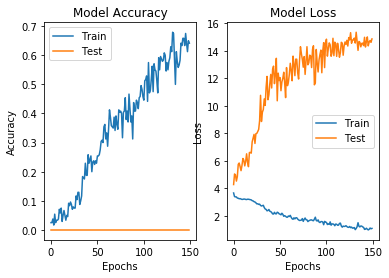

In [106]:
if __name__ == '__main__':
    main(Nh = [50, 500, 250, 300, 650], Pd = [0.05, 0.5, 0.3, 0.1, 0.2], epochs=150)